In [70]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load dataset

In [31]:
df = pd.read_csv('diabetes_binary_classification_data.csv')
df


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


#### Step 2 : Select features from conclusion of data preprocessing

In [32]:
# Define selected features and target variable
features = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 
             'Veggies', 'DiffWalk', 'BMI', 'GenHlth', 'PhysHlth', 'Age', 'Income']
X = df[features]
y = df['Diabetes_binary']

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Step 3: Model Training and Evaluation

##### Model 1 - Logistic Regression

In [75]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]
logistic_precision, logistic_recall, _ = precision_recall_curve(y_test, logistic_prob)
logistic_auc_pr = auc(logistic_recall, logistic_precision)
print(f"Logistic PR AUC: {logistic_auc_pr:.2f}")

Logistic PR AUC: 0.40


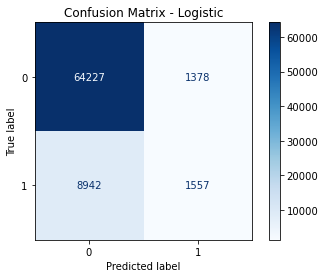

In [84]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, logistic_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic")
plt.show()

In [7]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logistic_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.53      0.15      0.23     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.58     76104
weighted avg       0.83      0.86      0.83     76104



##### Model 2 - Decision Tree

In [73]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]
decision_tree_precision, decision_tree_recall, _ = precision_recall_curve(y_test, decision_tree_prob)
decision_tree_auc_pr = auc(decision_tree_recall, decision_tree_precision)
print(f"Decision Tree PR AUC: {decision_tree_auc_pr:.2f}")

Decision Tree PR AUC: 0.32


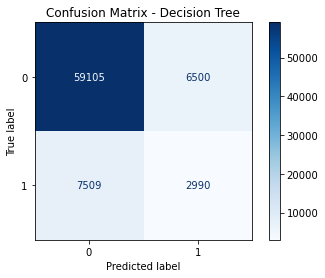

In [83]:
# Confusion Matrix for Decision Tree
conf_matrix = confusion_matrix(y_test, decision_tree_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [11]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, decision_tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.89     65605
         1.0       0.32      0.29      0.30     10499

    accuracy                           0.82     76104
   macro avg       0.60      0.59      0.60     76104
weighted avg       0.81      0.82      0.81     76104



##### Model 3 - Random Forest

In [72]:
# Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_pred = random_forest_model.predict(X_test)
random_forest_prob = random_forest_model.predict_proba(X_test)[:, 1]
random_forest_precision, random_forest_recall, _ = precision_recall_curve(y_test, random_forest_prob)
random_forest_auc_pr = auc(random_forest_recall, random_forest_precision)
print(f"Random Forest PR AUC: {random_forest_auc_pr:.2f}")

Random Forest PR AUC: 0.33


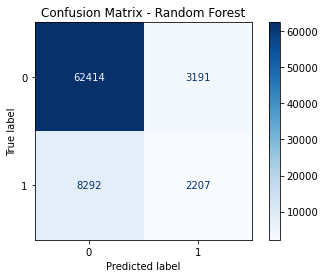

In [19]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, random_forest_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [20]:
print("Random Forest Classification Report:")
print(classification_report(y_test, random_forest_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92     65605
         1.0       0.41      0.21      0.28     10499

    accuracy                           0.85     76104
   macro avg       0.65      0.58      0.60     76104
weighted avg       0.82      0.85      0.83     76104



In this diabetes prediction, false negative is more important, so we should focus on `recall`(`sensitivity`) to evaluate the model. we're primarily interested in how well the model identifies true positives (people with diabetes) while minimizing false negatives (those who are incorrectly classified as not having diabetes). Compare with recall of 3 models in the `Diabetes_binary=1 `, decision tree perform slightly better, which means better at identifying diabetic individuals (fewer false negatives).

##### PR Curve Comparison for three models ( the dataset is imbalanced dataset,so we use PR-curve)

In [69]:
# check whether dataset is a balanced dataset
class_distribution = df['Diabetes_binary'].value_counts()

# Print the class distribution
print("Class distribution:")
print(class_distribution)

# Calculate the proportion of each class
class_proportion = class_distribution / len(df)
print("\nClass proportions:")
print(class_proportion)

Class distribution:
0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

Class proportions:
0.0    0.860667
1.0    0.139333
Name: Diabetes_binary, dtype: float64


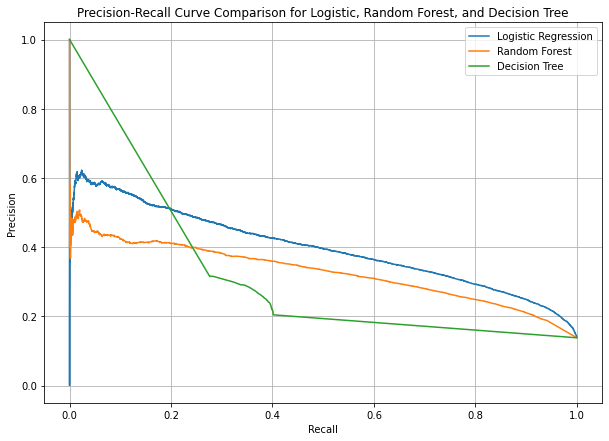

In [76]:
# Plot PR Curves for all models
plt.figure(figsize=(10, 7))

plt.plot(logistic_recall, logistic_precision, label='Logistic Regression')
plt.plot(random_forest_recall, random_forest_precision, label='Random Forest')
plt.plot(decision_tree_recall, decision_tree_precision, label='Decision Tree')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison for Logistic, Random Forest, and Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

The higher the AUC, the better the model's ability to distinguish between the classes, with a focus on precision and recall, which are important in imbalanced datasets like this one. Based on these results, Logistic Regression slightly outperforms the other models in terms of precision and recall.

#### Step 4(Optional) : Experiment on apply PCA to compare the result

In [24]:
# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components based on explained variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Explained variance ratio for understanding how much variance is retained by each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each PCA component: ", explained_variance)

Explained Variance by each PCA component:  [0.57772064 0.31216788 0.06869888 0.02896364 0.00539892 0.00176457
 0.00129945 0.00122312 0.00101516 0.00068161]


In [25]:
# Get the components (eigenvectors) and their contributions
pca_components = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components)])

# Display the components and their contributions to each principal component
print(pca_components)

        HighBP  HighChol  CholCheck    Stroke  HeartDiseaseorAttack  \
PC1   0.011097  0.007808   0.000785  0.003440              0.006283   
PC2   0.012656  0.005187   0.000775 -0.000645              0.000036   
PC3  -0.057643 -0.044522  -0.005424 -0.007528             -0.020420   
PC4   0.015712  0.000114  -0.003915  0.007550              0.009259   
PC5  -0.123311 -0.103383  -0.008369 -0.021666             -0.058650   
PC6   0.554667  0.806580   0.030794  0.023735              0.083402   
PC7   0.096746 -0.100356  -0.012365  0.008777             -0.000854   
PC8  -0.809540  0.566836  -0.013156 -0.014058             -0.021028   
PC9  -0.013846 -0.027235   0.001034  0.000626             -0.006759   
PC10 -0.061918 -0.016947   0.010899  0.103428              0.296404   

      PhysActivity   Veggies  DiffWalk       BMI   GenHlth  PhysHlth  \
PC1      -0.011528 -0.003265  0.021230  0.201683  0.067008  0.973622   
PC2      -0.005868 -0.002730  0.003708  0.978152  0.015613 -0.203287   
PC

In [26]:
# Sort and select the top contributing features for the first principal component
top_features_pc1 = pca_components.loc['PC1'].abs().sort_values(ascending=False)
print("Top features contributing to PC1: ", top_features_pc1)

Top features contributing to PC1:  PhysHlth                0.973622
BMI                     0.201683
Income                  0.068492
GenHlth                 0.067008
Age                     0.037040
DiffWalk                0.021230
PhysActivity            0.011528
HighBP                  0.011097
HighChol                0.007808
HeartDiseaseorAttack    0.006283
Stroke                  0.003440
Veggies                 0.003265
CholCheck               0.000785
Name: PC1, dtype: float64


In [34]:
pca = PCA(n_components=None)  # Do not set the number of components yet, let PCA determine
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [35]:
# Explained variance for each principal component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance by each PCA component: ", explained_variance)

Explained Variance by each PCA component:  [5.77720638e-01 3.12167880e-01 6.86988791e-02 2.89636382e-02
 5.39891932e-03 1.76457068e-03 1.29944854e-03 1.22312039e-03
 1.01515551e-03 6.81614387e-04 5.47179330e-04 2.60161512e-04
 2.58794459e-04]


In [41]:
# Select the components where the explained variance > 0.01
selected_components = np.where(explained_variance > 0.006)[0]
print("Selected Components (Variance > 0.006):", selected_components)

Selected Components (Variance > 0.006): [0 1 2 3]


In [42]:
# Retain only the selected components
X_train_pca_selected = X_train_pca[:, selected_components]
X_test_pca_selected = X_test_pca[:, selected_components]

In [43]:
# check the shape of the new PCA-transformed datasets
print("X_train_pca_selected shape:", X_train_pca_selected.shape)
print("X_test_pca_selected shape:", X_test_pca_selected.shape)

X_train_pca_selected shape: (177576, 4)
X_test_pca_selected shape: (76104, 4)


#### model 1: Logistic Model using new feature list

In [79]:
# Initialize models
pca_logistic_model = LogisticRegression(max_iter=1000)
pca_logistic_model.fit(X_train_pca_selected, y_train)
pca_logistic_pred = pca_logistic_model.predict(X_test_pca_selected)
pca_logistic_prob = pca_logistic_model.predict_proba(X_test_pca_selected)[:, 1]
pca_logistic_precision, pca_logistic_recall, _ = precision_recall_curve(y_test, pca_logistic_prob)
pca_logistic_auc_pr = auc(pca_logistic_recall, pca_logistic_precision)
print(f"Logistic PR AUC: {pca_logistic_auc_pr:.2f}")

Logistic PR AUC: 0.33


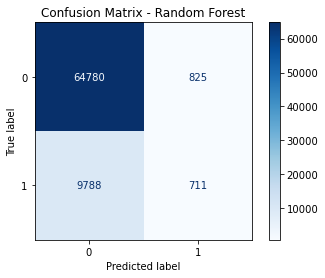

In [50]:
# Confusion Matrix for Logistic Regression
conf_matrix = confusion_matrix(y_test, pca_logistic_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [51]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, pca_logistic_pred))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.99      0.92     65605
         1.0       0.46      0.07      0.12     10499

    accuracy                           0.86     76104
   macro avg       0.67      0.53      0.52     76104
weighted avg       0.81      0.86      0.81     76104



##### Model 2 - Decision Tree model using new feature list

In [80]:
# Decision Tree
pca_decision_tree_model = DecisionTreeClassifier()
pca_decision_tree_model.fit(X_train_pca_selected, y_train)
pca_decision_tree_pred = pca_decision_tree_model.predict(X_test_pca_selected)
pca_decision_tree_prob = pca_decision_tree_model.predict_proba(X_test_pca_selected)[:, 1]
pca_decision_tree_precision, pca_decision_tree_recall, _ = precision_recall_curve(y_test, pca_decision_tree_prob)
pca_decision_tree_auc_pr = auc(pca_decision_tree_recall, pca_decision_tree_precision)
print(f"Decision Tree PR AUC: {pca_decision_tree_auc_pr:.2f}")

Decision Tree PR AUC: 0.30


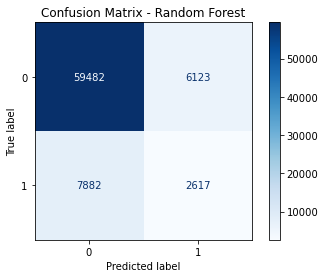

In [53]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, pca_decision_tree_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [54]:
print("Decision Tree Classification Report:")
print(classification_report(y_test, pca_decision_tree_pred))

Decision Tree Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     65605
         1.0       0.30      0.25      0.27     10499

    accuracy                           0.82     76104
   macro avg       0.59      0.58      0.58     76104
weighted avg       0.80      0.82      0.81     76104



##### model 3: Random Froest using new feature list

In [81]:
# Random Forest
pca_random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
pca_random_forest_model.fit(X_train_pca_selected, y_train)
pca_random_forest_pred = pca_random_forest_model.predict(X_test_pca_selected)
pca_random_forest_prob = pca_random_forest_model.predict_proba(X_test_pca_selected)[:, 1]
pca_random_forest_precision, pca_random_forest_recall, _ = precision_recall_curve(y_test, pca_random_forest_prob)
pca_random_forest_auc_pr = auc(pca_random_forest_recall, pca_random_forest_precision)
print(f"Random Forest PR AUC: {pca_random_forest_auc_pr:.2f}")

Random Forest PR AUC: 0.29


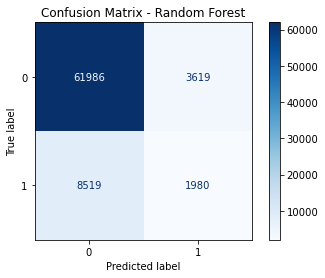

In [56]:
# Confusion Matrix for Random Forest
conf_matrix = confusion_matrix(y_test, pca_random_forest_pred)
ConfusionMatrixDisplay(conf_matrix).plot(cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [57]:
print("Random Forest Classification Report:")
print(classification_report(y_test, pca_random_forest_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     65605
         1.0       0.35      0.19      0.25     10499

    accuracy                           0.84     76104
   macro avg       0.62      0.57      0.58     76104
weighted avg       0.81      0.84      0.82     76104



#### ROC Curve Comparison

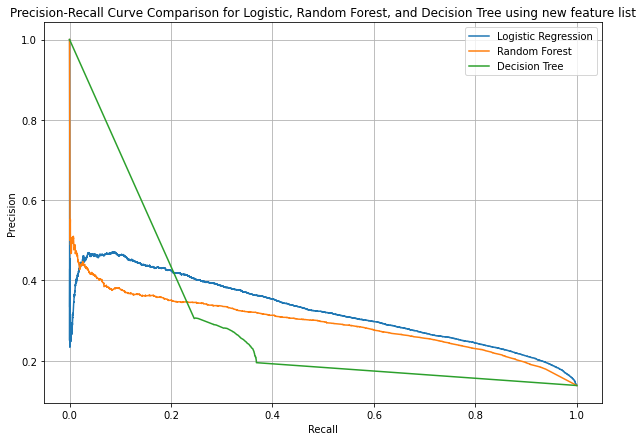

In [82]:
# Plot PR Curves for all models
plt.figure(figsize=(10, 7))

plt.plot(pca_logistic_recall, pca_logistic_precision, label='Logistic Regression')
plt.plot(pca_random_forest_recall, pca_random_forest_precision, label='Random Forest')
plt.plot(pca_decision_tree_recall, pca_decision_tree_precision, label='Decision Tree')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison for Logistic, Random Forest, and Decision Tree using new feature list')
plt.legend()
plt.grid(True)
plt.show()

From PCA analysis, we can see that the model performance actually not good as when we take more features, which is showing that all the features we selected are essential to the prediction